<a href="https://colab.research.google.com/github/chelynl/Machine_Learning/blob/main/05_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

Model Assumptions:
- Linearity of independent variables and log odds (logit transformation is the correct transformation)
- Independent observations (should not come from repeated measurements or matched data)
- No perfect multicollinearity among independent variables
- No outliers or missing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## **Exercise 1: Probability of making a purchase**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/chelynl/ML_notes/main/classification/Social_Network_Ads.csv?token=AMGO4MCBJKBNTVSMEJMR5Y3AYJ5HW')

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


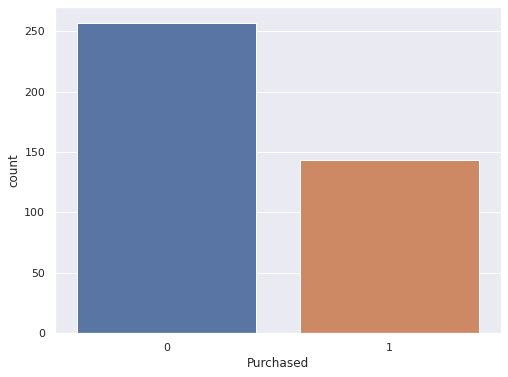

In [5]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.countplot(df.Purchased)

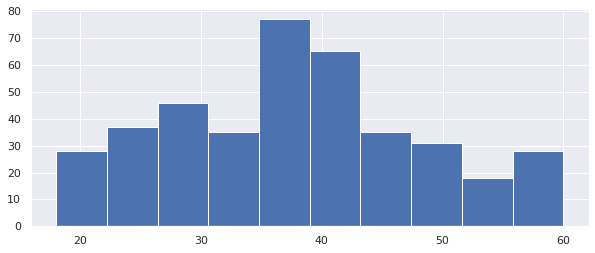

In [6]:
plt.figure(figsize=(10,4))
df.Age.hist()

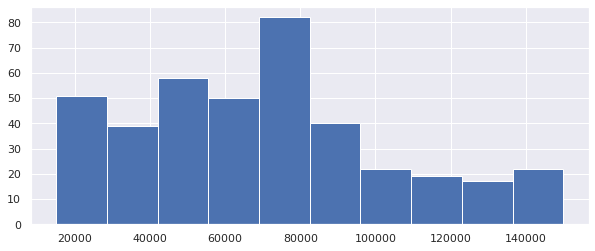

In [7]:
plt.figure(figsize=(10,4))
df.EstimatedSalary.hist()

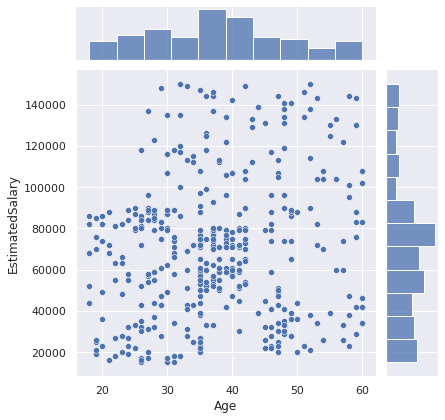

In [8]:
sns.jointplot(x='Age', y='EstimatedSalary', data=df)

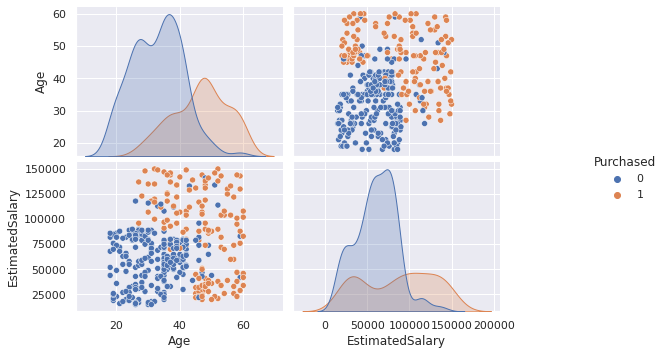

In [9]:
pp = sns.pairplot(df, hue='Purchased')
pp.fig.set_size_inches(10,5)

In [10]:
# Define target and inputs
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [11]:
# Partition dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Scaling
- technically not required for logistic regression because it's a linear model but will improve training performance
- put features on the same scale
- no feature scaling for binary target

Use `fit_transform()` on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. Only use `transform()` on the test data because we use the scaling paramaters learned on the train data to scale the test data.

In [12]:
# Instantiate scaler object
ss = StandardScaler()

# Transform features on training set
X_train = ss.fit_transform(X_train)

# Transform features on test set
X_test = ss.transform(X_test)

### Train logistic regression model

In [13]:
# Build and train model
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

# Get predictions
y_pred = logreg.predict(X_test)

In [14]:
# Predict whether or not a 30 yr old person making 87k makes a purchase... prediction says no
print(logreg.predict(ss.transform([[30, 87000]])))

[0]


### Visualize results
- can see separator (prediction curve) as a linear model
- only works with up to 3 features (not feasible in industry); cannot visualize more than 3d

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


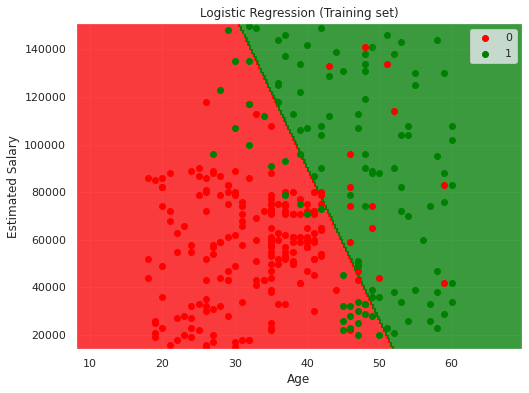

In [15]:
from matplotlib.colors import ListedColormap

# Convert scaled data back to original form
X_set, y_set = ss.inverse_transform(X_train), y_train

# meshgrid() creates coordinates for a rectangular grid of given x- and y-values needed as input for contourf()
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

# Plot prediction curve and regions
plt.contourf(X1, X2, logreg.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Limit plot dimensions
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Model Evaluation
- `Confusion matrix`: see TP, TN, FP, FN
- `Precision`: what proportion of positives was actually correct (positive predictive value, PPV)
- `Recall`: what proportion of actual positives were correctly identified (TPR, sensitivity)
- `Accuracy`: what proportion of postives and negatives were correctly identified
- `F1 score`: conveys balance between precision and recall
- `AUC`: shows quality of ROC curve plotting TPR and FPR (want close to 1)
- `Lift score`: predicted rate ÷ average rate
- `Depth`: TP + FP (required for interpreting lift score)

***

**Confusion Matrix**<br>
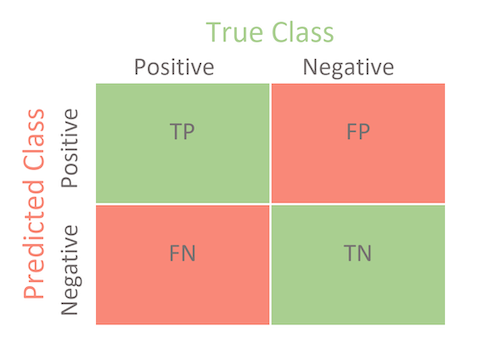

In [21]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[46,  2],
       [13, 19]])

- 46 purchases were correctly identified (TP)
- 2 false purchases were identified (FP)
- 13 actual purchases were not identified (FN)
- 19 no purchases were correctly identified (TN)

In [19]:
# 81.25% of overall purchases and no-purchases were correctly identified
accuracy_score(y_test, y_pred)

0.8125

In [22]:
# See full report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        48
           1       0.90      0.59      0.72        32

    accuracy                           0.81        80
   macro avg       0.84      0.78      0.79        80
weighted avg       0.83      0.81      0.80        80



## **Exercise 2: Probability of clicking on ad**

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/chelynl/ML_notes/main/classification/advertising.csv?token=AMGO4MC6PR5ICLUQJ3I4453AYNZFI')

In [28]:
print('Dimensions: ', df.shape)
df.head()

Dimensions:  (1000, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [30]:
# No missing values
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [31]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Remove unnecessary columns

In [32]:
# Too many unique values for one-hot encoding
df = df.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp'])

### EDA

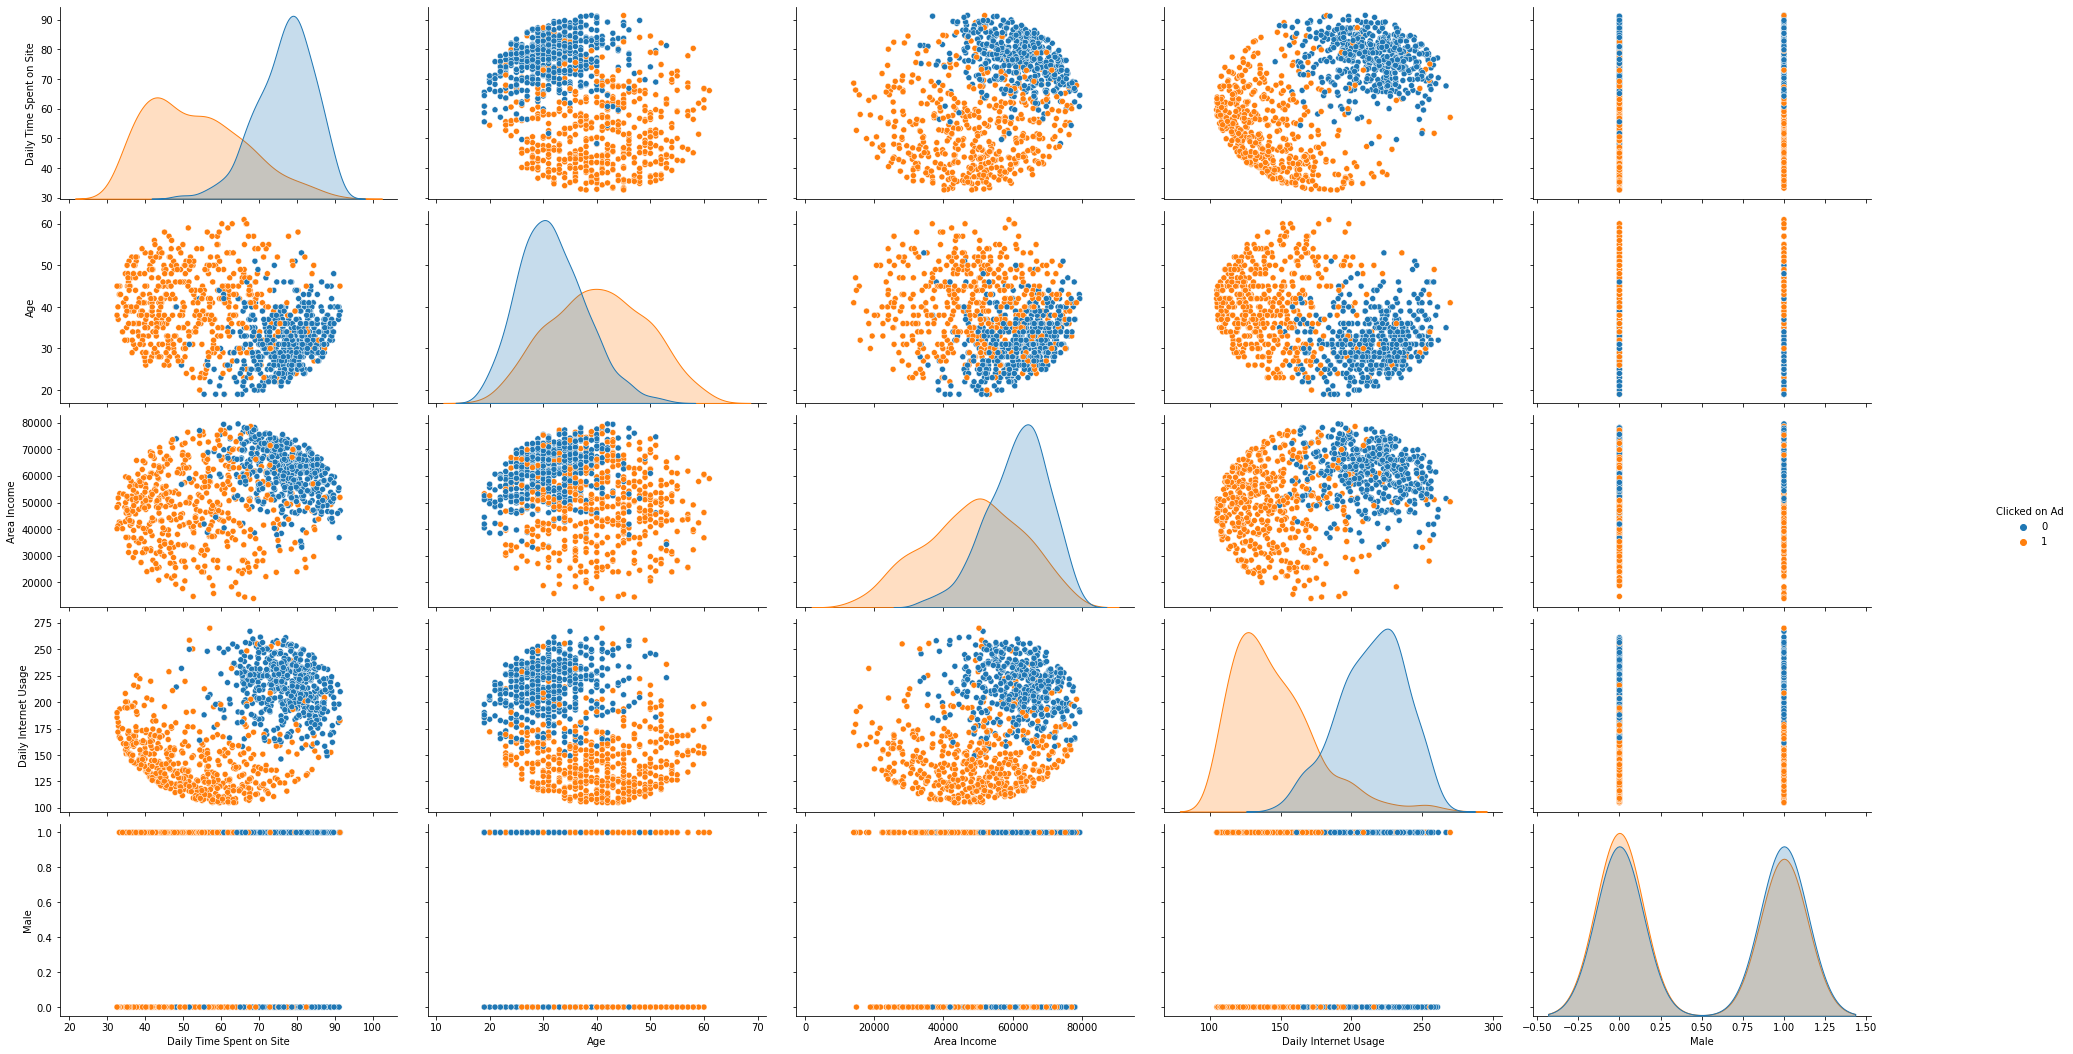

In [11]:
pp = sns.pairplot(df, hue='Clicked on Ad')
pp.fig.set_size_inches(30,15)

In [33]:
# Define target and inputs
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

# Features
col_names = df.iloc[:,:-1].columns

In [34]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
# Build prelim model
logreg = LogisticRegression(random_state=125)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=125, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Daily Time Spent on Site: -0.060182
Age: 0.2639
Area Income: -1.6305e-05
Daily Internet Usage: -0.024384
Male: 0.0019393


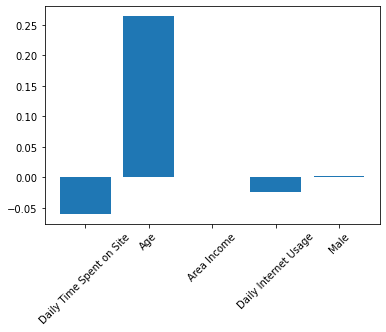

In [36]:
# Store importance scores in list
importance = logreg.coef_[0]

# See importance scores
for i, j in zip(col_names, importance):
  print('{}: {:.5}'.format(i, j))

# Visualize importance scores
plt.bar(col_names, importance)
plt.xticks(rotation=45)
plt.show()

# Male does not seem to be an important feature

In [20]:
# Drop male col
df.drop(columns='Male', inplace=True)

# Define target and inputs
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

# Features
col_names = df.iloc[:,:-1].columns

# Partition data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# Build final model
logreg = LogisticRegression(random_state=125)
logreg.fit(X_train, y_train)

# Get predictions
y_pred = logreg.predict(X_test)

In [22]:
# Confusion matrix
confusion_matrix(y_pred, y_test)

array([[100,   9],
       [  6,  85]])

- 100 people who clicked on the ad were correctly identified
- 9 people were incorrectly identified to have clicked on the ad when they did not
- 6 people were incorrectly identified to have not clicked on the ad when they did
- 85 people who did not click on the ad were correctly identified

In [23]:
# Accuracy
accuracy_score(y_pred, y_test)

0.925

In [25]:
# Classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       109
           1       0.90      0.93      0.92        91

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

